In [1]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('E:/Data Science/Projects/Python_projects/Corona_virus_analyst_project/covid_19_data.csv')

df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [5]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

## 1.What is the total number of confirmed cases worldwide?

In [7]:
df['Confirmed'].sum()

26252051758.0

### The Total Number of Confirmed Cases Worldwide are 26,252,051,758

## 2.How many deaths have been reported globally?

In [10]:
df['Deaths'].sum()

624013017.0

### The Total Number of Death Reported Globally are 624,013,017

## 3.What is the total number of recovered cases worldwide?

In [13]:
df['Recovered'].sum()

15450237912.0

### The Total Number of Recovered Cases are 15,450,237,912

## 4.How many countries/regions are represented in the dataset?

In [16]:
a = df['Country/Region'].unique()

In [17]:
len(a)

229

### There are 229 Countries/Regions are represented in the dataset

## 5.What is the trend of confirmed cases over time globally?

In [20]:
df['ObservationDate'].isna().unique()               # Checking Null Values

array([False])

In [21]:
df['Confirmed'].isna().unique()                     # Checking Null Values

array([False])

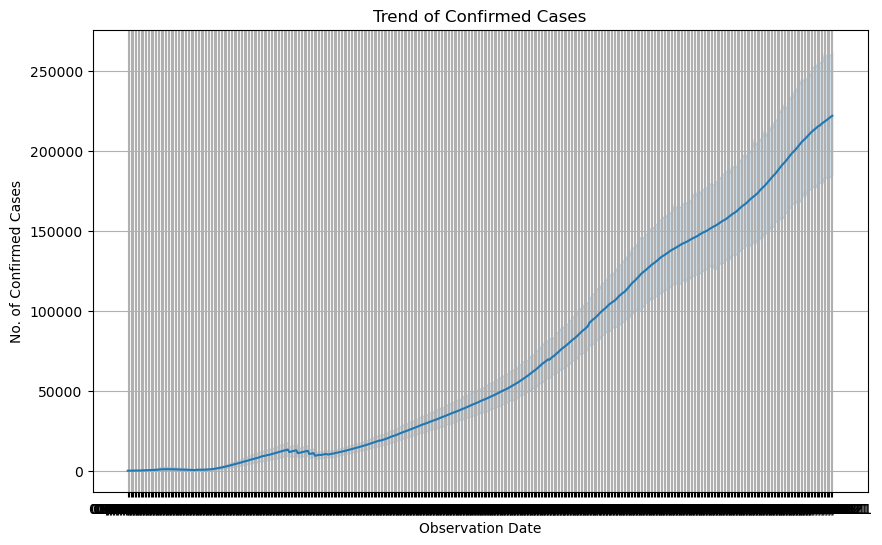

In [22]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='ObservationDate', y = 'Confirmed')
plt.xlabel('Observation Date')
plt.ylabel('No. of Confirmed Cases')
plt.title('Trend of Confirmed Cases')
plt.grid()     # Grid lines for better readability       
plt.show()

In [23]:
df['ObservationDate']= pd.to_datetime(df['ObservationDate'])       # Changing Data Type of Observation Date from float to Dates

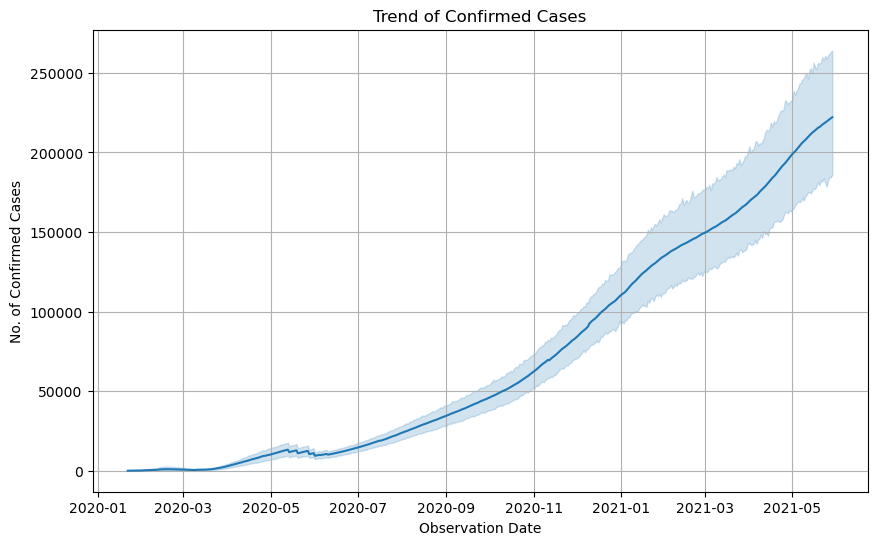

In [24]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='ObservationDate', y = 'Confirmed')
plt.xlabel('Observation Date')
plt.ylabel('No. of Confirmed Cases')
plt.title('Trend of Confirmed Cases')
plt.grid()     # Grid lines for better readability       
plt.show()

### The Number of Confirmed Cases saw a Massive Upward Trend as Time Progressed

## 6.Which province/state has reported the highest number of confirmed cases?

In [27]:
df['Province/State'].isna().unique()               # Checking Null Values

array([False,  True])

In [28]:
df1 = df.dropna(subset='Province/State')           # Dropping Null Values

In [29]:
df1['Province/State'].isna().unique()              # Rechecking Null Values

array([False])

In [30]:
df1['Confirmed'].isna().unique()                   # Checking Null Values

array([False])

In [31]:
pd.DataFrame(df1.groupby('Province/State')[['Province/State','Confirmed']].sum().max())

,0
Province/State,Zuid-HollandZuid-HollandZuid-HollandZuid-Holla...
Confirmed,696898013.0


### The Highest Number of Confirmed Cases are from "Zuid-Holland" with the number being 696,898,013

## 7.Which country/region has the highest number of deaths?

In [34]:
df['Country/Region'].isna().unique()               # Checking Null Values

array([False])

In [35]:
df['Deaths'].isna().unique()                       # Checking Null Values

array([False])

In [36]:
pd.DataFrame(df.groupby('Country/Region')[['Country/Region','Deaths']].sum().max())

,0
Country/Region,occupied Palestinian territoryoccupied Palesti...
Deaths,123303762.0


### The Highest Number of Deaths by Corona are from "Occupied Palestinian Territory" with the number being 123,303,762

## 8.How does the number of confirmed cases vary across different provinces/states?

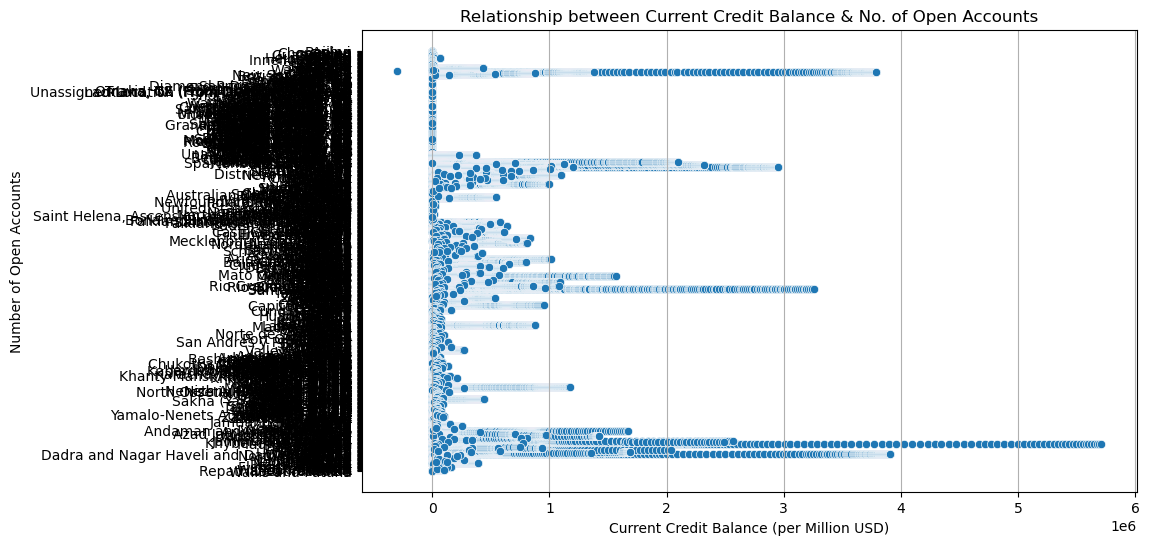

In [39]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df1,x='Confirmed',y='Province/State')
plt.xlabel('Current Credit Balance (per Million USD)')
plt.ylabel('Number of Open Accounts')
plt.grid(axis='x')  # Grid Lines for better readability
plt.title('Relationship between Current Credit Balance & No. of Open Accounts')
plt.show()

In [40]:
pd.DataFrame(df1.groupby('Province/State')['Confirmed'].var().round(2))

,Confirmed
Province/State,
"Montreal, QC",1.120000e+00
"Norfolk County, MA",3.000000e-01
Abruzzo,6.820510e+08
Acre,4.944389e+08
Adygea Republic,2.481698e+07
...,...
Zaporizhia Oblast,1.313785e+09
Zeeland,8.446176e+07
Zhejiang,2.959065e+04


## 9.What is the trend of deaths over time globally?

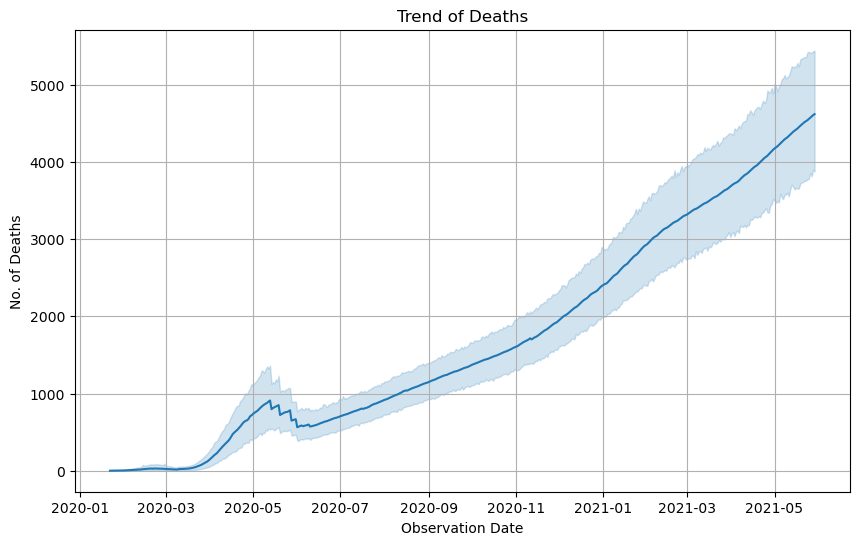

In [42]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='ObservationDate', y = 'Deaths')
plt.xlabel('Observation Date')
plt.ylabel('No. of Deaths')
plt.title('Trend of Deaths')
plt.grid()     # Grid lines for better readability       
plt.show()

### The Number of Deaths saw a Massive Upward Trend as Time Progressed.

## 10.Which country/region has the highest number of recovered cases?

In [45]:
df['Recovered'].isna().unique()             # Checking Null Values      

array([False])

In [46]:
pd.DataFrame(df.groupby('Country/Region')[['Country/Region','Recovered']].sum().max())

,0
Country/Region,occupied Palestinian territoryoccupied Palesti...
Recovered,2900589824.0


### The Highest Number of Recovered Cases Corona are from "Occupied Palestinian Territory" with the number being 2,900,589,824

## 11.How does the number of recovered cases vary across different countries/regions?

In [49]:
df['Country/Region'].isna().unique()

array([False])

In [50]:
df['Recovered'].isna().unique()

array([False])

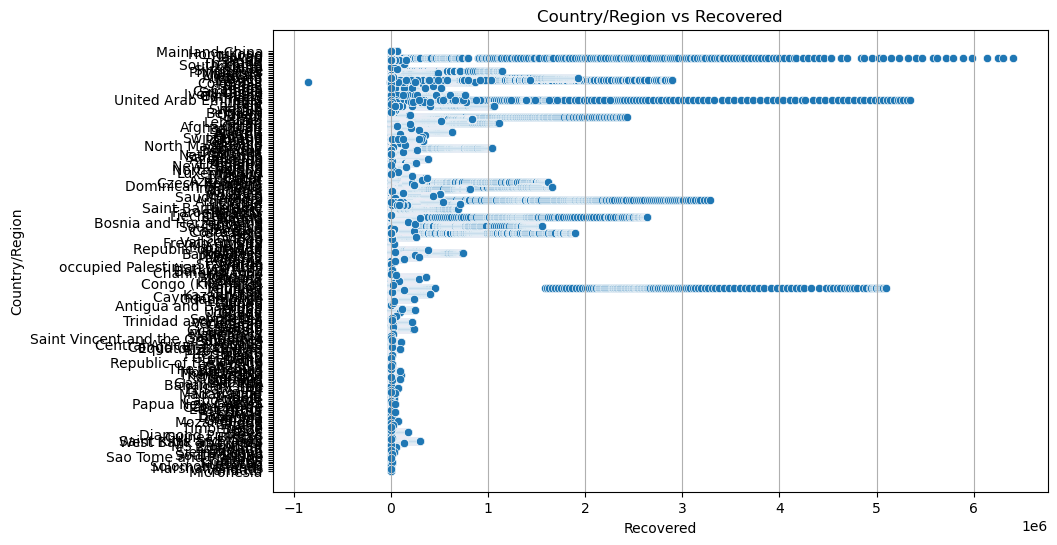

In [51]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Recovered',y='Country/Region')
plt.xlabel('Recovered')
plt.ylabel('Country/Region')
plt.grid(axis='x')  # Grid Lines for better readability
plt.title('Country/Region vs Recovered')
plt.show()

In [52]:
pd.DataFrame(df.groupby(by='Country/Region')['Recovered'].var())

,Recovered
Country/Region,
Azerbaijan,NaN
"('St. Martin',)",NaN
Afghanistan,3.744015e+08
Albania,1.540147e+09
Algeria,9.882975e+08
...,...
West Bank and Gaza,9.020467e+09
Yemen,6.298220e+05
Zambia,1.096526e+09


## 12.What is the distribution of confirmed cases by country/region?

In [54]:
df.groupby('Country/Region')['Confirmed'].describe()

,count,mean,std,min,25%,50%,75%,max
Country/Region,,,,,,,,
Azerbaijan,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
"('St. Martin',)",1.0,2.000000,NaN,2.0,2.00,2.0,2.00,2.0
Afghanistan,461.0,36933.713666,20468.598683,1.0,27536.00,39799.0,55174.00,70111.0
Albania,447.0,44225.657718,48875.730729,2.0,2434.00,17055.0,84774.00,132297.0
Algeria,460.0,60183.386957,45463.126828,1.0,11474.25,53198.5,108182.25,128456.0
...,...,...,...,...,...,...,...,...
West Bank and Gaza,430.0,97254.520930,101991.136015,84.0,6005.75,51240.0,165335.25,307838.0
Yemen,415.0,2318.231325,1738.498416,1.0,1647.00,2063.0,2145.00,6731.0
Zambia,438.0,30808.111872,34298.960371,2.0,1632.00,16065.0,64350.75,94751.0


## 13.Is there a correlation between the number of confirmed cases and deaths?

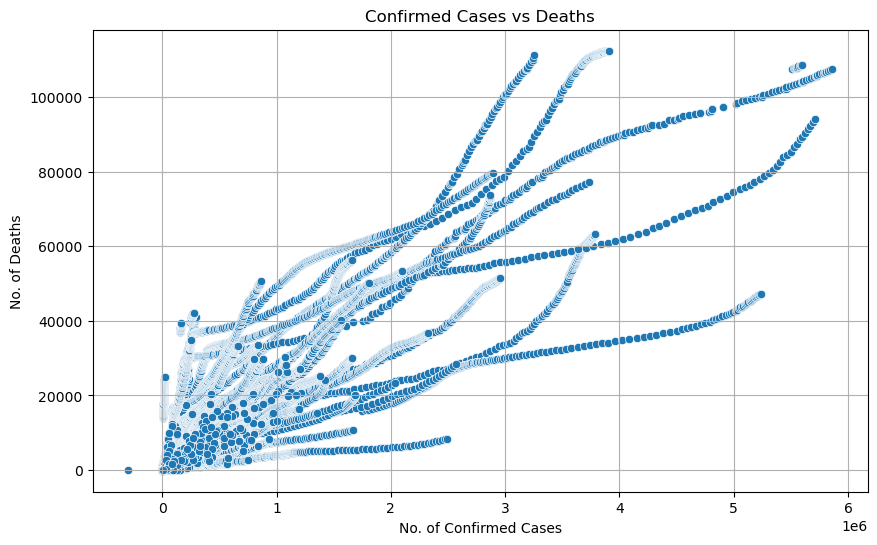

In [56]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Confirmed',y='Deaths')
plt.xlabel('No. of Confirmed Cases')
plt.ylabel('No. of Deaths')
plt.grid()  # Grid Lines for better readability
plt.title('Confirmed Cases vs Deaths')
plt.show()

In [57]:
df[['Confirmed','Deaths']].corr()

,Confirmed,Deaths
Confirmed,1.000000,0.888416
Deaths,0.888416,1.000000


###  The Correlation between Confirmed Cases and Deaths is 0.888416, which shows that they are Highly Correlated.

## 14.Is there a correlation between the number of confirmed cases and recovered cases?

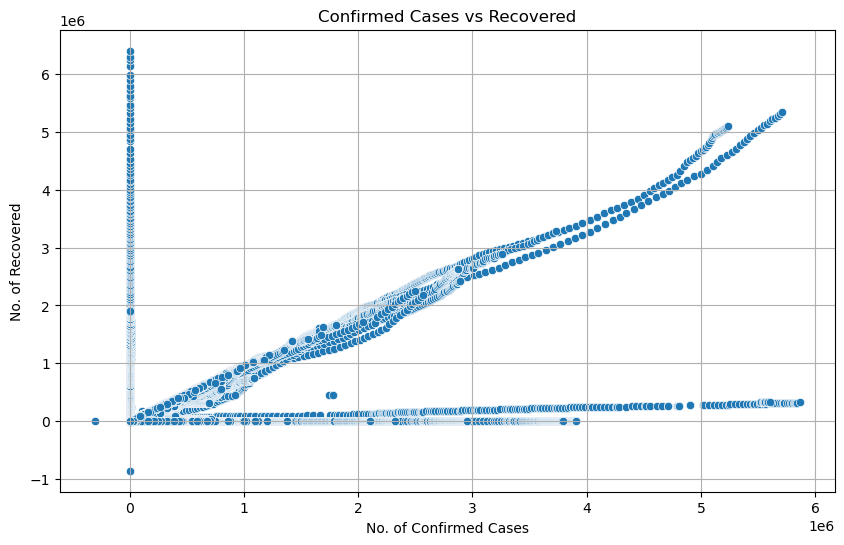

In [60]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Confirmed',y='Recovered')
plt.xlabel('No. of Confirmed Cases')
plt.ylabel('No. of Recovered')
plt.grid()  # Grid Lines for better readability
plt.title('Confirmed Cases vs Recovered')
plt.show()

In [61]:
df[['Confirmed','Recovered']].corr()

,Confirmed,Recovered
Confirmed,1.000000,0.633479
Recovered,0.633479,1.000000


###  The Correlation between Confirmed Cases and Recovered is 0.633479, which shows that they are Correlated.

## 15.How does the mortality rate vary across different countries/regions?

In [64]:
DeathsperCountry = df.groupby('Country/Region')['Deaths'].sum()

In [65]:
DeathsperCountry

Country/Region
 Azerbaijan                            0.0
('St. Martin',)                        0.0
Afghanistan                       669075.0
Albania                           375955.0
Algeria                           834464.0
                                    ...   
West Bank and Gaza                440378.0
Yemen                             237613.0
Zambia                            205990.0
Zimbabwe                          237234.0
occupied Palestinian territory         0.0
Name: Deaths, Length: 229, dtype: float64

In [66]:
ConfirmedperCountry = df.groupby('Country/Region')['Confirmed'].sum()

In [67]:
ConfirmedperCountry

Country/Region
 Azerbaijan                              1.0
('St. Martin',)                          2.0
Afghanistan                       17026442.0
Albania                           19768869.0
Algeria                           27684358.0
                                     ...    
West Bank and Gaza                41819444.0
Yemen                               962066.0
Zambia                            13493953.0
Zimbabwe                           6484581.0
occupied Palestinian territory          25.0
Name: Confirmed, Length: 229, dtype: float64

In [68]:
MortalityRate = DeathsperCountry/ConfirmedperCountry

In [69]:
MortalityRate

Country/Region
 Azerbaijan                       0.000000
('St. Martin',)                   0.000000
Afghanistan                       0.039296
Albania                           0.019018
Algeria                           0.030142
                                    ...   
West Bank and Gaza                0.010530
Yemen                             0.246982
Zambia                            0.015265
Zimbabwe                          0.036584
occupied Palestinian territory    0.000000
Length: 229, dtype: float64

In [70]:
MortalityRate.var()

0.0006503876102516994

## 16.How does the recovery rate vary across different countries/regions?

In [72]:
RecoveryperCountry = df.groupby('Country/Region')['Recovered'].sum()

In [73]:
RecoveryperCountry

Country/Region
 Azerbaijan                              0.0
('St. Martin',)                          0.0
Afghanistan                       13464399.0
Albania                           13945256.0
Algeria                           18959299.0
                                     ...    
West Bank and Gaza                37003116.0
Yemen                               506523.0
Zambia                            12625626.0
Zimbabwe                           5594887.0
occupied Palestinian territory           0.0
Name: Recovered, Length: 229, dtype: float64

In [74]:
RecoveryRate = RecoveryperCountry/ConfirmedperCountry

In [75]:
RecoveryperCountry

Country/Region
 Azerbaijan                              0.0
('St. Martin',)                          0.0
Afghanistan                       13464399.0
Albania                           13945256.0
Algeria                           18959299.0
                                     ...    
West Bank and Gaza                37003116.0
Yemen                               506523.0
Zambia                            12625626.0
Zimbabwe                           5594887.0
occupied Palestinian territory           0.0
Name: Recovered, Length: 229, dtype: float64

In [76]:
RecoveryRate.var()

0.11067949751536442

## 17.What is the trend of new confirmed cases over time globally?

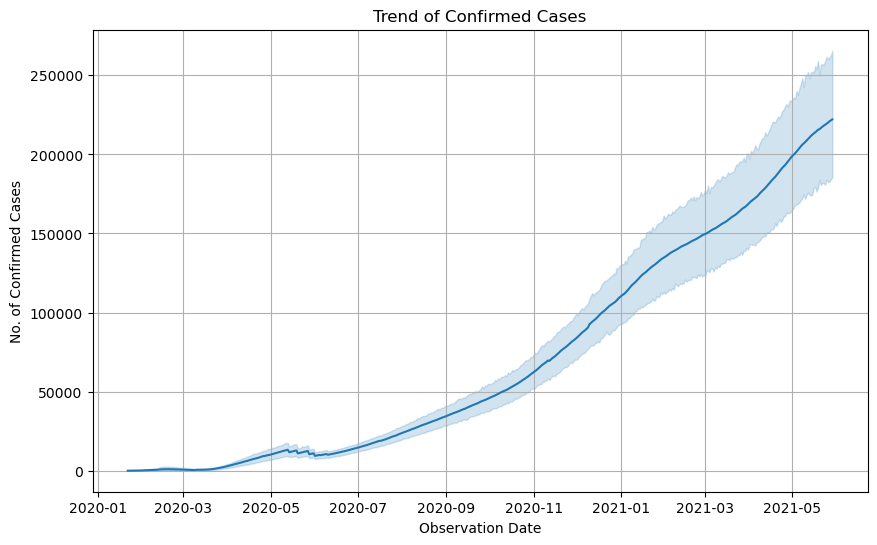

In [78]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='ObservationDate', y = 'Confirmed')
plt.xlabel('Observation Date')
plt.ylabel('No. of Confirmed Cases')
plt.title('Trend of Confirmed Cases')
plt.grid()     # Grid lines for better readability       
plt.show()

### The Number of New Confirmed Cases saw a Massive Upward Trend as Time Progressed.

## 18.How does the fatality rate vary across different provinces/states?

In [81]:
DeathsperState = df1.groupby('Province/State')['Deaths'].sum()

In [82]:
DeathsperState

Province/State
 Montreal, QC               0.0
 Norfolk County, MA         0.0
Abruzzo                418541.0
Acre                   301620.0
Adygea Republic         30296.0
                         ...   
Zaporizhia Oblast      225346.0
Zeeland                 43004.0
Zhejiang                  465.0
Zhytomyr Oblast        206047.0
Zuid-Holland           850487.0
Name: Deaths, Length: 736, dtype: float64

In [83]:
ConfirmedperState = df1.groupby('Province/State')['Confirmed'].sum()

In [84]:
ConfirmedperState

Province/State
 Montreal, QC                17.0
 Norfolk County, MA           7.0
Abruzzo                10889970.0
Acre                   14897611.0
Adygea Republic         3012608.0
                          ...    
Zaporizhia Oblast      13858457.0
Zeeland                 3454955.0
Zhejiang                 620252.0
Zhytomyr Oblast        11740027.0
Zuid-Holland           55835700.0
Name: Confirmed, Length: 736, dtype: float64

In [85]:
FatalityRate = DeathsperState/ConfirmedperState

In [86]:
FatalityRate

Province/State
 Montreal, QC          0.000000
 Norfolk County, MA    0.000000
Abruzzo                0.038434
Acre                   0.020246
Adygea Republic        0.010056
                         ...   
Zaporizhia Oblast      0.016261
Zeeland                0.012447
Zhejiang               0.000750
Zhytomyr Oblast        0.017551
Zuid-Holland           0.015232
Length: 736, dtype: float64

In [87]:
FatalityRate.var()

0.0014071735697823583

## 19.How does the recovery rate vary across different provinces/states?

In [89]:
df1['Province/State'].isna().unique()

array([False])

In [90]:
RecoveryperState = df1.groupby('Province/State')['Recovered'].sum()

In [91]:
RecoveryperState.isna().unique()

array([False])

In [92]:
RecoveryRateforState = RecoveryperState/ConfirmedperState

In [93]:
RecoveryRateforState

Province/State
 Montreal, QC          0.000000
 Norfolk County, MA    0.000000
Abruzzo                0.731228
Acre                   0.826167
Adygea Republic        0.875049
                         ...   
Zaporizhia Oblast      0.740099
Zeeland                0.000000
Zhejiang               0.959102
Zhytomyr Oblast        0.793641
Zuid-Holland           0.000000
Length: 736, dtype: float64

In [94]:
RecoveryRateforState.var()

nan

In [95]:
RecoveryRateforState.isna().unique()

array([False,  True])

In [96]:
RecoveryRateforState = RecoveryRateforState.dropna()

In [97]:
RecoveryRateforState

Province/State
 Montreal, QC          0.000000
 Norfolk County, MA    0.000000
Abruzzo                0.731228
Acre                   0.826167
Adygea Republic        0.875049
                         ...   
Zaporizhia Oblast      0.740099
Zeeland                0.000000
Zhejiang               0.959102
Zhytomyr Oblast        0.793641
Zuid-Holland           0.000000
Length: 732, dtype: float64

In [98]:
RecoveryRateforState.isna().unique()

array([False])

In [99]:
RecoveryRateforState.var()

nan

## 20.What is the trend of active cases over time globally?

In [101]:
df['Active Cases'] = df['Confirmed'] - df['Recovered'] - df['Deaths']

In [102]:
print('Data Frame after adding "Active Cases" Column')
df

Data Frame after adding "Active Cases" Column


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active Cases
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,14.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,6.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
306424,306425,2021-05-29,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0,5017.0
306425,306426,2021-05-29,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0,28902.0
306426,306427,2021-05-29,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0,39.0
306427,306428,2021-05-29,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0,2022.0


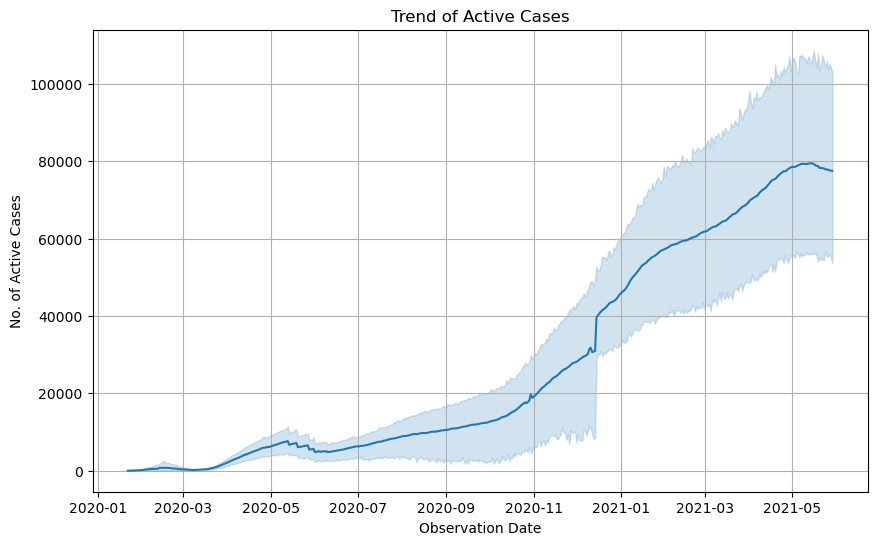

In [103]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='ObservationDate', y = 'Active Cases')
plt.xlabel('Observation Date')
plt.ylabel('No. of Active Cases')
plt.title('Trend of Active Cases')
plt.grid()     # Grid lines for better readability       
plt.show()

### The Number of Active Cases saw a Massive Upward Trend as Time Progressed.